# DAT210x - Programming with Python for DS

## Module5- Lab10

In [3]:
import numpy as np
import pandas as pd

from sklearn.utils.validation import check_random_state
import scipy.io.wavfile as wavfile

In [49]:
from sklearn import linear_model

Good Luck! Heh.

### About Audio

Samples are Observations. Each audio file will is a single sample in our dataset.

Find more information about [Audio Samples here](https://en.wikipedia.org/wiki/Sampling_(signal_processing)).

Each .wav file is actually just a bunch of numeric samples, "sampled" from the analog signal. Sampling is a type of discretization. When we mention 'samples', we mean observations. When we mention 'audio samples', we mean the actually "features" of the audio file.

The goal of this lab is to use multi-target, linear regression to generate by extrapolation, the missing portion of the test audio file.

Each one audio_sample features will be the output of an equation, which is a function of the provided portion of the audio_samples:

    missing_samples = f(provided_samples)

You can experiment with how much of the audio you want to chop off and have the computer generate using the Provided_Portion parameter.

Play with this. This is how much of the audio file will be provided, in percent. The remaining percent of the file will be generated via linear extrapolation.

In [4]:
Provided_Portion = 0.25

### The Assignment

You have to download the dataset (audio files) from the website: https://github.com/Jakobovski/free-spoken-digit-dataset

Start by creating a regular Python List called `zero`:

In [34]:
zero = []

Loop through the dataset and load up all 50 of the `0_jackson*.wav` files using the `wavfile.read()` method: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.io.wavfile.read.html Be careful! `.read()` returns a tuple and you're only interested in the audio data, and not sample_rate at this point. Inside your for loop, simply append the loaded audio data into your Python list `zero`:

In [35]:
for i in range(0,50):
    imported = wavfile.read('../Module5/Datasets/lab10/0_jackson_' + str(i) + '.wav')
    zero.append(imported[1])

In [61]:
wavfile.read('../Module5/Datasets/lab10/0_jackson_1.wav')[0]

8000

In [36]:
zero

[array([-369, -431, -475, ...,  301,  324,  304], dtype=int16),
 array([-311,  -91, -140, ...,  378,  357,  333], dtype=int16),
 array([-361, -226, -238, ..., -286, -311, -343], dtype=int16),
 array([ 323,  338,  357, ..., -246, -280, -301], dtype=int16),
 array([-302, -312, -103, ..., -338, -333, -348], dtype=int16),
 array([ 305,  365,  419, ..., -313, -342, -346], dtype=int16),
 array([ 364,  420,  469, ..., -326, -334, -351], dtype=int16),
 array([-417,  152,  168, ...,  312,  316,  309], dtype=int16),
 array([ 330,  382,  389, ..., -410, -400, -385], dtype=int16),
 array([-312, -335, -338, ...,  384,  371,  345], dtype=int16),
 array([-314, -303, -332, ..., -355, -343, -322], dtype=int16),
 array([347, 351, 462, ..., 365, 338, 302], dtype=int16),
 array([-336,  160,   65, ..., -315, -343, -319], dtype=int16),
 array([ 354,  442,  610, ..., -312, -336, -333], dtype=int16),
 array([ 397,  531,  638, ..., -357, -386, -353], dtype=int16),
 array([ 382,  459,  530, ..., -254, -301, -30

In [37]:
len(zero)

50

Just for a second, convert zero into a DataFrame. When you do so, set the `dtype` to `np.int16`, since the input audio files are 16 bits per sample. If you don't know how to do this, read up on the docs here: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html

Since these audio clips are unfortunately not length-normalized, we're going to have to just hard chop them to all be the same length. Since Pandas would have inserted NANs at any spot to make zero a  perfectly rectangular [n_observed_samples, n_audio_samples] array, do a `dropna` on the Y axis here. Then, convert one back into an NDArray using `yourarrayname.values`:

In [40]:
zero_df = pd.DataFrame(zero)
zero_df = zero_df.dropna(axis = 1)
zero_df = zero_df.astype('int16')

In [41]:
zero_df[0].dtypes

dtype('int16')

In [42]:
zero_df

,0,1,2,3,4,5,6,7,8,9,...,4077,4078,4079,4080,4081,4082,4083,4084,4085,4086
0,-369,-431,-475,-543,-571,-557,-528,-455,-394,-305,...,2475,2500,2331,1786,1057,358,158,-108,-402,-884
1,-311,-91,-140,-182,-271,-68,-235,-359,-129,-198,...,-122,-207,-266,-276,-316,-359,-396,-422,-462,-460
2,-361,-226,-238,-478,-425,-395,-663,-879,-726,-997,...,-141,-83,0,71,165,284,325,378,416,438
3,323,338,357,388,381,393,391,378,348,313,...,1323,1321,1211,827,292,-244,-779,-1241,-1369,-1229
4,-302,-312,-103,-305,-145,-339,12,-433,-141,-189,...,189,211,189,134,150,224,265,313,328,327
5,305,365,419,486,540,594,602,624,603,576,...,-735,-679,-526,-315,103,675,1051,1087,770,403
6,364,420,469,529,557,575,574,533,467,385,...,1925,1059,468,27,-380,-534,-631,-697,-714,-898
7,-417,152,168,-176,-48,243,-83,-77,159,-14,...,594,663,670,724,788,820,770,638,463,332
8,330,382,389,401,429,426,390,405,379,338,...,117,-88,-238,-253,-110,111,375,602,708,701
9,-312,-335,-338,-344,-338,-332,-303,-261,-233,-197,...,-1537,-1499,-1398,-1143,-857,-583,-31,644,815,580


In [43]:
zero = zero_df.values

It's important to know how (many audio_samples samples) long the data is now.

`zero` is currently shaped like `[n_samples, n_audio_samples]`, so get the `n_audio_samples` count and store it in a variable called `n_audio_samples`:

In [48]:
n_audio_samples = zero.shape[1]

In [63]:
n_audio_samples

4087

Create your linear regression model here and store it in a variable called `model`. Don't actually train or do anything else with it yet:

In [50]:
model = linear_model.LinearRegression()

There are 50 takes of each clip. You want to pull out just one of them, randomly, and that one will NOT be used in the training of your model. In other words, the one file we'll be testing / scoring on will be an unseen sample, independent to the rest of your training set:

In [51]:
# Leave this line alone until you've submitted your lab:
rng = check_random_state(7)

random_idx = rng.randint(zero.shape[0])
test  = zero[random_idx]
train = np.delete(zero, [random_idx], axis=0)

Print out the shape of `train`, and the shape of `test`.

`train` will be shaped: `[n_samples, n_audio_samples]`, where `n_audio_samples` are the 'features' of the audio file 

`test` will be shaped `[n_audio_features]`, since it is a single sample (audio file, e.g. observation).

In [57]:
print(train.shape, test.shape)

(49, 4087) (4087,)


In [70]:
test

array([ 320,  372,  421, ..., 1433, 1616, 1427], dtype=int16)

The test data will have two parts, `X_test` and `y_test`.

`X_test` is going to be the first portion of the test audio file, which we will be providing the computer as input. 

`y_test`, the "label" if you will, is going to be the remaining portion of the audio file. Like such, the computer will use linear regression to derive the missing portion of the sound file based off of the training data its received!

Let's save the original `test` clip, the one you're about to delete half of, to the current directory so that you can compare it to the 'patched' clip once you've generated it. You should have already got the `sample_rate` when you were loading up the .wav files:

In [62]:
wavfile.write('../Module5/Datasets/lab10/Original Test Clip.wav', 8000, test)

Prepare the TEST data by creating a slice called `X_test`. It should have `Provided_Portion` * `n_audio_samples` audio sample features, taken from your test audio file, currently stored in variable `test`. In other words, grab the FIRST `Provided_Portion` * `n_audio_samples` audio features from `test` and store it in `X_test`. This should be accomplished using indexing:

In [80]:
X_test = test[0:int(n_audio_samples * Provided_Portion)]
print(X_test)
X_test.shape

[  320   372   421 ..., -3458 -3306 -4050]


(1021,)

If the first `Provided_Portion` * `n_audio_samples` features were stored in `X_test`, then we need to also grab the _remaining_ audio features and store them in `y_test`. With the remaining features stored in there, we will be able to R^2 "score" how well our algorithm did in completing the sound file.

In [81]:
y_test = test[int(n_audio_samples * Provided_Portion):n_audio_samples]
print(y_test)
y_test.shape

[-3306 -1833  -893 ...,  1433  1616  1427]


(3066,)

Duplicate the same process for `X_train`, `y_train`. The only differences being:

1. Your will be getting your audio data from `train` instead of from `test`
2. Remember the shape of `train` that you printed out earlier? You want to do this slicing but for ALL samples (observations). For each observation, you want to slice the first `Provided_Portion` * `n_audio_samples` audio features into `X_train`, and the remaining go into `y_train`. All of this should be doable using regular indexing in two lines of code:

In [77]:
X_train = train[:,0:int(n_audio_samples * Provided_Portion)]
y_train = train[:,int(n_audio_samples * Provided_Portion):n_audio_samples]
print(X_train.shape, y_train.shape)

(49, 1021) (49, 3066)


SciKit-Learn gets 'angry' if you don't supply your training data in the form of a 2D dataframe shaped like `[n_samples, n_features]`.

So if you only have one SAMPLE, such as is our case with `X_test`, and `y_test`, then by calling `.reshape(1, -1)`, you can turn `[n_features]` into `[1, n_features]` in order to appease SciKit-Learn.

On the other hand, if you only have one FEATURE, you can alternatively call `.reshape(-1, 1)` on your data to turn `[n_samples]` into `[n_samples, 1]`.

Reshape X_test and y_test as [1, n_features]:

In [82]:
X_test = pd.DataFrame(X_test.reshape(1, -1))
y_test = pd.DataFrame(y_test.reshape(1, -1))

Fit your model using your training data and label:

In [84]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Use your model to predict the `label` of `X_test`. Store the resulting prediction in a variable called `y_test_prediction`:

In [108]:
y_test_prediction = model.predict(X_test)
y_test_prediction

array([[-3697.26144977, -2611.88367206,  -950.63073317, ...,
          365.60470046,   -91.92965335,  -482.66662016]])

In [109]:
len(y_test_prediction[0])

3066

SciKit-Learn will use float64 to generate your predictions so let's take those values back to int16, which is what our .wav files expect:

In [110]:
y_test_prediction = y_test_prediction.astype(dtype=np.int16)

Score how well your prediction would do for some good laughs, by passing in your test data and test label `y_test`:

In [111]:
y_test.append(pd.DataFrame(y_test_prediction))

,0,1,2,3,4,5,6,7,8,9,...,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065
0,-3306,-1833,-893,-405,450,1975,3343,3581,3795,4113,...,-1751,-2016,-2324,-1977,-1095,70,965,1433,1616,1427
0,-3697,-2611,-950,-382,1345,2073,3589,4747,5046,5072,...,-908,-283,494,1225,1940,2063,1216,365,-91,-482


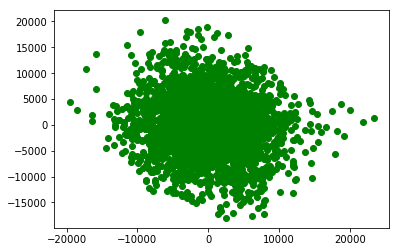

In [112]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y_test_prediction, y_test, c='g', marker='o')
plt.show()

In [113]:
score = model.score(X_test, y_test)

In [114]:
print("Extrapolation R^2 Score: ", score)

Extrapolation R^2 Score:  0.0


Let's take the first `Provided_Portion` portion of the test clip, the part you fed into your linear regression model. Then, stitch that together with the 'abomination' the predictor model generated for you and then save the completed audio clip:

In [115]:
completed_clip = np.hstack((X_test, y_test_prediction))
wavfile.write('Extrapolated Clip.wav', 8000, completed_clip[0])

Congrats on making it to the end of this crazy lab and module =) !

In [116]:
np.hstack((X_test, y_test_prediction))

array([[ 320,  372,  421, ...,  365,  -91, -482]], dtype=int16)

In [117]:
wavfile.write('Extrapolated Clip2.wav', 8000, np.hstack((X_test, y_test))[0])